In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
# KMeans는 비지도 학습이므로 y가 필요없지만, 시각화를 위해 생성
X, y = make_blobs(n_samples=100,
                  n_features=2,
                  centers=5,
                  random_state=20)

In [16]:
y

array([1, 0, 4, 0, 3, 1, 2, 4, 2, 2, 0, 2, 1, 4, 0, 3, 4, 4, 4, 2, 2, 4,
       0, 4, 1, 0, 4, 2, 4, 2, 4, 1, 3, 0, 1, 3, 1, 2, 0, 0, 0, 4, 3, 2,
       2, 0, 1, 3, 4, 2, 1, 2, 0, 2, 3, 1, 3, 1, 1, 0, 3, 4, 3, 3, 1, 4,
       3, 1, 4, 1, 3, 0, 2, 0, 3, 4, 3, 1, 0, 2, 1, 3, 0, 2, 4, 3, 0, 0,
       4, 1, 3, 1, 3, 3, 2, 1, 2, 0, 4, 2])

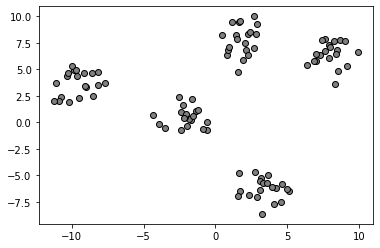

In [8]:
plt.scatter(X[:,0],X[:,1],
            c='gray',
            edgecolor='black',
            marker='o')
plt.show()

In [10]:
kms = KMeans(n_clusters=5,
             init='random',
             max_iter=100,
             random_state=20)
kms.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(init='random', max_iter=100, n_clusters=5, random_state=20)

In [24]:
kms.score(X)

-205.90150257010833

In [14]:
label_kms = kms.labels_
print(label_kms)

[4 1 2 1 0 4 3 2 3 3 1 3 4 2 1 0 2 2 2 3 3 2 1 2 4 1 2 3 2 3 2 4 0 1 4 0 4
 3 1 1 1 2 0 3 3 1 4 0 2 3 4 3 1 3 0 4 0 4 4 1 0 2 0 0 4 2 0 4 2 4 0 1 3 1
 0 2 0 4 1 3 4 0 1 3 2 0 1 1 2 4 0 4 0 0 3 4 3 1 2 3]


In [15]:
kms_columns = ['kms_comp1', 'kms_comp2']
X_kms_df = pd.DataFrame(X, columns=kms_columns)
X_kms_df['target']=y
X_kms_df['label_kms']= label_kms
X_kms_df

,kms_comp1,kms_comp2,target,label_kms
0,7.275429,6.318258,1,4
1,0.827678,6.341284,0,1
2,4.211921,-6.216467,4,2
3,2.702085,6.975794,0,1
4,-4.367647,0.711654,3,0
...,...,...,...,...
95,7.001922,6.430797,1,4
96,-10.232226,4.693151,2,3
97,0.970599,7.111907,0,1
98,1.543130,-6.974960,4,2


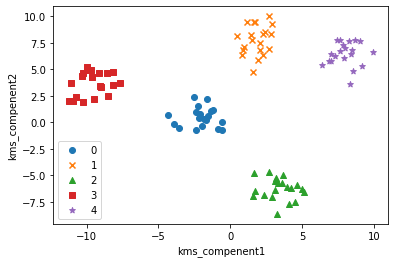

In [19]:
markers = ['o','x','^','s','*']
for i, mark in enumerate(markers):
  df_i = X_kms_df[X_kms_df['label_kms']==i]
  target_i = i
  X1 = df_i['kms_comp1']
  X2 = df_i['kms_comp2']
  plt.scatter(X1, X2, marker=mark, label=target_i)

plt.xlabel('kms_compenent1')
plt.ylabel('kms_compenent2')
plt.legend()
plt.show()



In [20]:
def make_sc(label):
  markers = ['o','x','^','s','*']
  for i, mark in enumerate(markers):
    df_i = X_kms_df[X_kms_df[label]==i]
    target_i = i
    X1 = df_i['kms_comp1']
    X2 = df_i['kms_comp2']
    plt.scatter(X1, X2, marker=mark, label=target_i)

  plt.xlabel('kms_compenent1')
  plt.ylabel('kms_compenent2')
  plt.legend()
  plt.show()

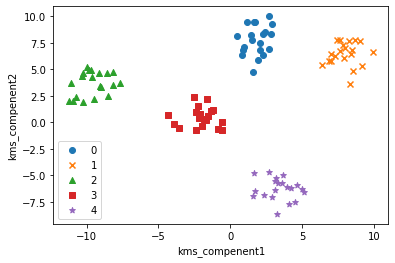

In [22]:
make_sc('target')

In [23]:
silhouette_score(X, label_kms) 

0.7448176781471781